# MINIST DATA

In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None,784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 
             'cost: ', '{:.9f}'.format(avg_cost))
        
    print("Learning finished")    

Epoch: 0001 cost:  2.854729795
Epoch: 0002 cost:  1.087017344
Epoch: 0003 cost:  0.859784010
Epoch: 0004 cost:  0.751112367
Epoch: 0005 cost:  0.682640890
Epoch: 0006 cost:  0.634188216
Epoch: 0007 cost:  0.597903521
Epoch: 0008 cost:  0.568711094
Epoch: 0009 cost:  0.545337124
Epoch: 0010 cost:  0.525307887
Epoch: 0011 cost:  0.508311875
Epoch: 0012 cost:  0.493449233
Epoch: 0013 cost:  0.480726551
Epoch: 0014 cost:  0.468886280
Epoch: 0015 cost:  0.459361248
Learning finished


# Test the model using test set

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.1394


# Get one and predict

Label:  [3]
Prediction:  [7]


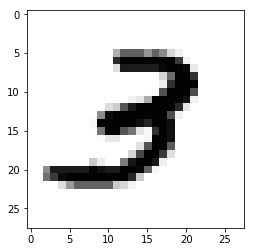

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28,28),
        cmap = 'Greys',
        interpolation = 'nearest')
    plt.show()
    